## Name - Pramukh Bharadwaj Kittoor Muralidhar 
### Github Username - pramukhbharadwaj


Import all the basic modules

In [52]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import mean_squared_error, r2_score


### 1. Combined Cycle Power Plant Data Set

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

#### (a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [53]:
df = pd.read_excel('../../data/combined_cycle_power_plant/Folds5x2_pp.xlsx')

df_copy = df.copy(deep = True)

print(df_copy)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


####  (b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

There are 9568 rows and 5 columns. The rows represent data points collected from a Combined Cycle Power Plant. Each data points has columns which represent features. Features consist of hourly average ambient variables Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH) to predict the net hourly electrical energy output (PE) of the plant.(last column)

ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

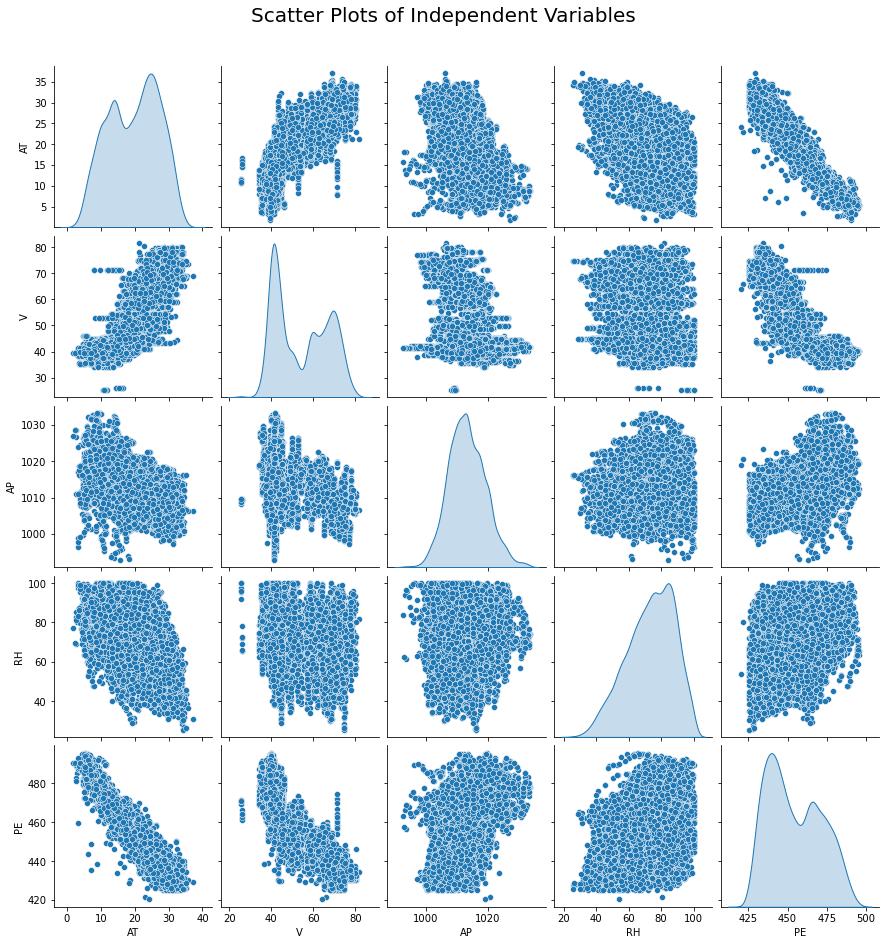

In [54]:
graph = seaborn.pairplot(df_copy, diag_kind="kde")
graph.fig.suptitle('Scatter Plots of Independent Variables',fontsize=20, y=1.05)

# to show
plt.show()

##### As the AT(temperature) increases energy output decreases. The same can be said for V(Exhaust Vacuum). Also there is a strong coorelation between AT and V as the plots are not scattered very much

iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [55]:
df_copy.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [56]:
summary = df_copy.describe()
summary.loc["range"] = summary.loc["max"]-summary.loc["min"]
summary.loc["interquartile Range"] = summary.loc["75%"]-summary.loc["25%"]
summary = summary.rename(index={'25%': 'first_quartile', '50%': 'median', '75%': 'third_quartile'})

summary = summary.drop(summary.index[[0, 2, 3, 7]])


print(summary)


                            AT          V           AP         RH          PE
mean                 19.651231  54.305804  1013.259078  73.308978  454.365009
first_quartile       13.510000  41.740000  1009.100000  63.327500  439.750000
median               20.345000  52.080000  1012.940000  74.975000  451.550000
third_quartile       25.720000  66.540000  1017.260000  84.830000  468.430000
range                35.300000  56.200000    40.410000  74.600000   75.500000
interquartile Range  12.210000  24.800000     8.160000  21.502500   28.680000


#### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [57]:

def linear_regression(feature, plotGraphs=True, printSummary=True):
    X = df_copy[feature]
    y = df_copy["PE"]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()    
    
    
    #print model summary
    if(printSummary):
        print(model.summary())
    
    
    
    if(plotGraphs):
        #plot linear regression
        plt.figure(figsize=(14,10))
        plt.xlabel(feature)
        plt.ylabel('PE')
        plt.grid(True)
        plt.title('Simple Linear Regression with {} as feature'.format(feature))
        plt.scatter(X[feature], y)
        plt.plot(X[feature], model.fittedvalues, color='red')
        plt.show()
    
        #outlier detection using cook's distance
        cook_distance = OLSInfluence(model).cooks_distance
        (distance, p_value) = cook_distance
        sns.scatterplot(X[feature], y, hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(feature, fontsize=14)
        plt.ylabel('PE', fontsize=14)
        plt.title('Outlier detection using Cook\'s distance', fontsize=20);
        plt.show()
        
    return model.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:00   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


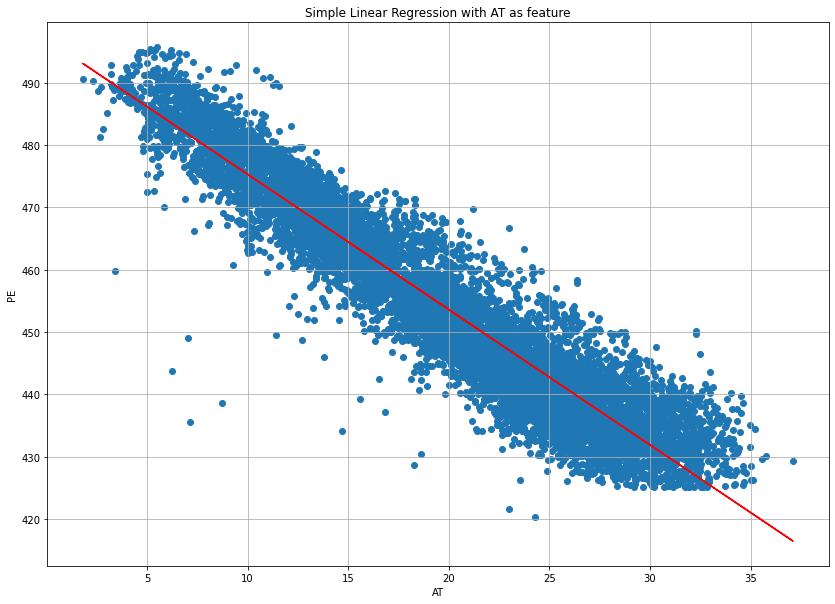

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


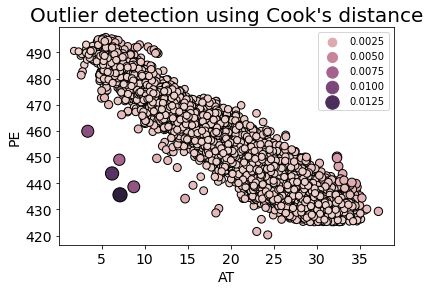

const    497.03412
AT        -2.17132
dtype: float64

In [58]:
linear_regression('AT')

##### We will reject null hypothesis since the p-value is zero and there is significant association with AT(Average Temperature) and PE(Energy output)

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:01   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

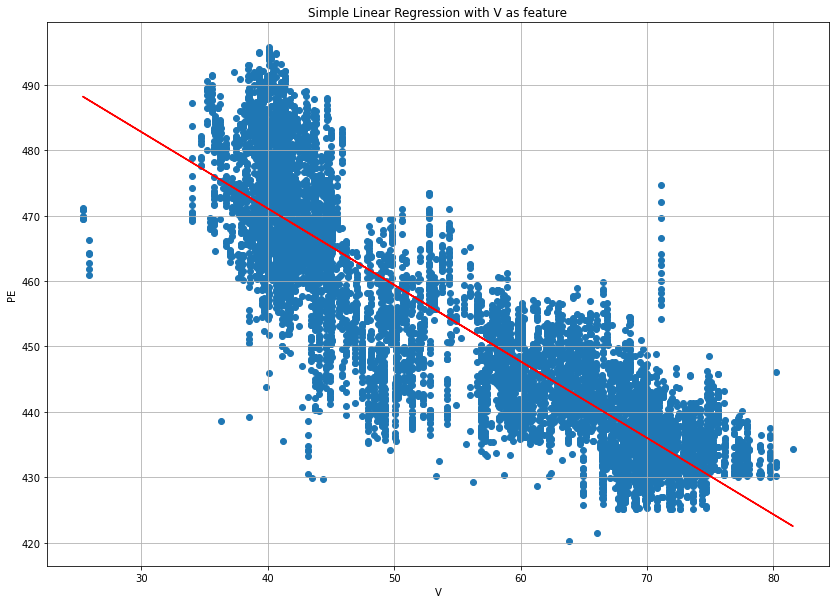

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


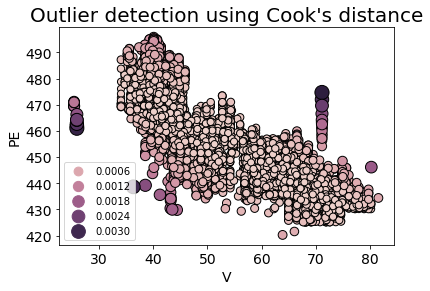

const    517.801526
V         -1.168135
dtype: float64

In [59]:
linear_regression('V')

We will reject null hypothesis since the p-value is zero and there is significant association with V(Exhaust Vacuum) and PE(Energy output)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:02   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


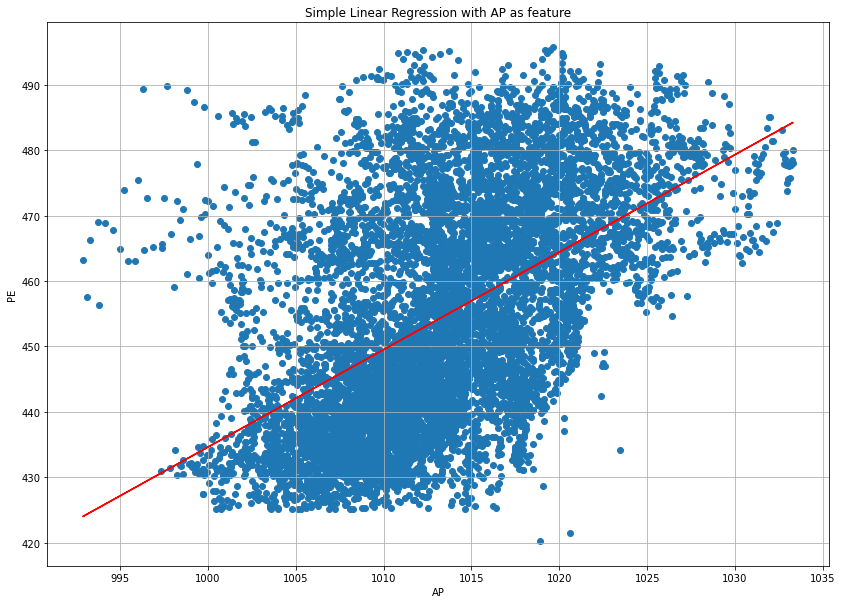

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


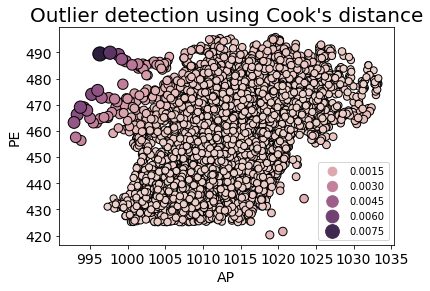

const   -1055.260989
AP          1.489872
dtype: float64

In [60]:
linear_regression('AP')

##### We will reject null hypothesis since the p-value is zero and there is significant association with AP(Ambient Pressure) and PE(Energy output)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:03   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


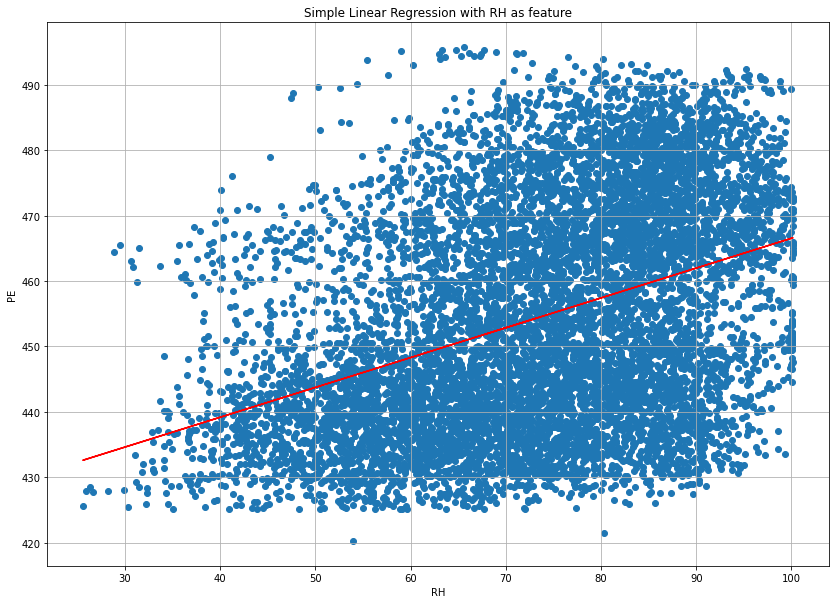

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


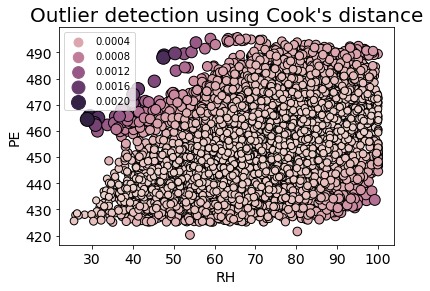

const    420.961766
RH         0.455650
dtype: float64

In [61]:
linear_regression('RH')

##### We will reject null hypothesis since the p-value is zero and there is significant association with RH(Relative Humidity) and PE(Energy output)

##### We must not remove outliers without doing a deep and thorough analysis of the points in question. Among other things, doing so might lead to a good fit on the training data, but poor predictions on unseen data. Outliers can also be very informative about the subject-area and data collection process. So, without further investigations, we must not remove outliers in any of the above regressions

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [62]:
linear_regression(["AT", "V", "AP", "RH"], False)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64

##### Since p-value is very small for all the features, we can reject the null hypothesis for all the features

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

If we look at the r-squared of all the simple linear regression(SLR) models to that of the Multiple linear regression models, we see that our multiple linear regression model(MLR) better explains the variations in the data. It has the maximum score of 0.929 whereas SLR for feature 'AT' has 0.899, SLR for feature 'V' has 0.757, SLR for feature 'AP' has 0.269 and SLR for feature 'RH' has 0.152

/Users/pramukhbharadwaj/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


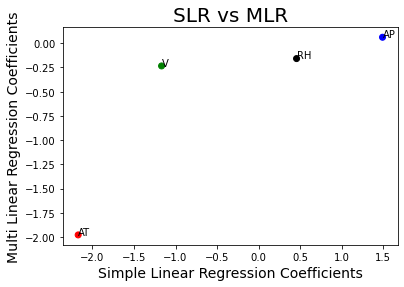

In [63]:
slr_coeff = []
slr_coeff.append(linear_regression('AT', False, False)[1])
slr_coeff.append(linear_regression('V', False, False)[1])
slr_coeff.append(linear_regression('AP', False, False)[1])
slr_coeff.append(linear_regression('RH', False, False)[1])


mlr_coeff = []
coeffHolder = linear_regression(["AT", "V", "AP", "RH"], False, False)
mlr_coeff.append(coeffHolder[1])
mlr_coeff.append(coeffHolder[2])
mlr_coeff.append(coeffHolder[3])
mlr_coeff.append(coeffHolder[4])


#print(slr_coeff)
#print(mlr_coeff)

n = ["AT", "V", "AP", "RH"]
plt.scatter(slr_coeff, mlr_coeff, color=['red','green','blue', 'black'])
plt.xlabel("Simple Linear Regression Coefficients", fontsize=14)
plt.ylabel('Multi Linear Regression Coefficients', fontsize=14)
plt.title('SLR vs MLR', fontsize=20);

for i in range(0,4):
    plt.text(slr_coeff[i], mlr_coeff[i], n[i])
    
plt.show()

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε

In [64]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)

X = df_copy["AT"].ravel().reshape(-1,1)
y = df_copy["PE"]
xp = polynomial_features.fit_transform(X)
    
model = sm.OLS(y, xp).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

Since the p-value for all the betas are small, we can discard the null hypothesis. There is a non-linear relationship between predictor "AT" and "PE"

In [65]:
X = df_copy["V"].ravel().reshape(-1,1)
y = df_copy["PE"]
xp = polynomial_features.fit_transform(X)
    
model = sm.OLS(y, xp).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

The terms 𝑋2 and 𝑋3  have large p-values. Therefore we don't have enough conficence to reject the Null Hypothesis. If we consider a threshold of p-value to be 0.01, then  𝑋3  also becomes insignificant. Thus, there isn't sufficient evidence to conlclude there is non-linear relationship between 'V' and output 'PE'

In [66]:
X = df_copy["AP"].ravel().reshape(-1,1)
y = df_copy["PE"]
xp = polynomial_features.fit_transform(X)
    
model = sm.OLS(y, xp).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

Since the p-value for all the betas are small, we can discard the null hypothesis. There is a non-linear relationship between predictor "AP" and "PE"

In [67]:
X = df_copy["RH"].ravel().reshape(-1,1)
y = df_copy["PE"]
xp = polynomial_features.fit_transform(X)
    
model = sm.OLS(y, xp).fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

Since the p-value for all the betas are small, we can discard the null hypothesis. There is a non-linear relationship between predictor "RH" and "PE"

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [68]:
formula_model = sm.OLS.from_formula('PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH', data=df_copy)
model = formula_model.fit() 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

We can see that pairs (AT, V), (AT, RH) and (V, AP) are statistically significant, as their p-values are extremely low. For significant threeshold value of 0.05 even pair (AP, RH) becomes statistically significant.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

##### Model with All the predictors

In [69]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_copy, test_size=0.3, random_state=25)
X_train, y_train, X_test, y_test = training_data.iloc[:, 0:4], training_data.iloc[:, 4], testing_data.iloc[:, 0:4], testing_data.iloc[:, 4]

In [70]:
formula =  'PE ~ AT + V + AP + RH'
formula_model = sm.OLS.from_formula(formula, data=training_data)
model = formula_model.fit()
print(model.summary())
model_prediction_train = model.predict(X_train)
print("Mean squared error train: %.2f"
      % mean_squared_error(y_train, model_prediction_train))
model_prediction = model.predict(X_test)
print("Mean squared error test: %.2f"
      % mean_squared_error(y_test, model_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_prediction))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.217e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -19611.
No. Observations:                6697   AIC:                         3.923e+04
Df Residuals:                    6692   BIC:                         3.927e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    453.1111     11.598     39.067      0.0

##### Regression with all predictors, interaction terms, and quadratic terms.

In [71]:
formula =  'PE ~ AT + V + AP + RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2) + I(AT*V) + I(AT*AP) + I(AT*RH) + I(V*AP)+ I(V*RH) + I(AP*RH)'
formula_model = sm.OLS.from_formula(formula, data=training_data)
model = formula_model.fit()

print(model.summary())

model_prediction_train = model.predict(X_train)
print("Mean squared error train: %.2f"
      % mean_squared_error(y_train, model_prediction_train))
model_prediction = model.predict(X_test)
print("Mean squared error test: %.2f"
      % mean_squared_error(y_test, model_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_prediction))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7347.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:06:04   Log-Likelihood:                -19142.
No. Observations:                6697   AIC:                         3.831e+04
Df Residuals:                    6682   BIC:                         3.842e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7962.9358   1442.252     -5.521      0.0

The p-values for the terms V^2, (AT, AP), (V, AP), (V, RH) is greater than threshold value of 0.05. Thus, these 4 terms shall dropped from the model as there is no evidence for statistical significance of these terms. We cannot drop the term 'V' and 'AT' from the model because it violates the hierachical priciple. There are interaction terms (AT, V) and (AT, RH) with 'V' and 'AT' still in the model which are statistically significant.

##### Regression with all predictors, interaction terms, and quadratic terms after removing insignificant values

In [81]:
formula =  'PE ~ AT + V + AP + RH + I(AT**2) + I(AP**2) + I(RH**2) + I(AT*V) + I(AT*RH) + I(AP*RH)'
formula_model = sm.OLS.from_formula(formula, data=training_data)
model = formula_model.fit()

print(model.summary())
model_prediction_train = model.predict(X_train)
print("Mean squared error train: %.2f"
      % mean_squared_error(y_train, model_prediction_train))
model_prediction = model.predict(X_test)
print("Mean squared error test: %.2f"
      % mean_squared_error(y_test, model_prediction))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, model_prediction))

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.027e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:09:47   Log-Likelihood:                -19150.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6686   BIC:                         3.840e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.085e+04   1083.877    -10.006      0.0

##### By comparing regression model with all-predictors and the one with nonlinear and polynomial terms, we can see a significant decrease in test MSE from 21.48 to 18.87

### i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [74]:
from sklearn.neighbors import KNeighborsRegressor

#Train Model and Predict
train_error_rate = {}
test_error_rate = {}
for i in range(1, 101, 1):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_train_value = knn.predict(X_train);
 train_error_rate[i] = mean_squared_error(y_train, pred_train_value)
 pred_test_value = knn.predict(X_test)
 test_error_rate[i] = mean_squared_error(y_test, pred_test_value)

Text(0, 0.5, 'Error Rate')

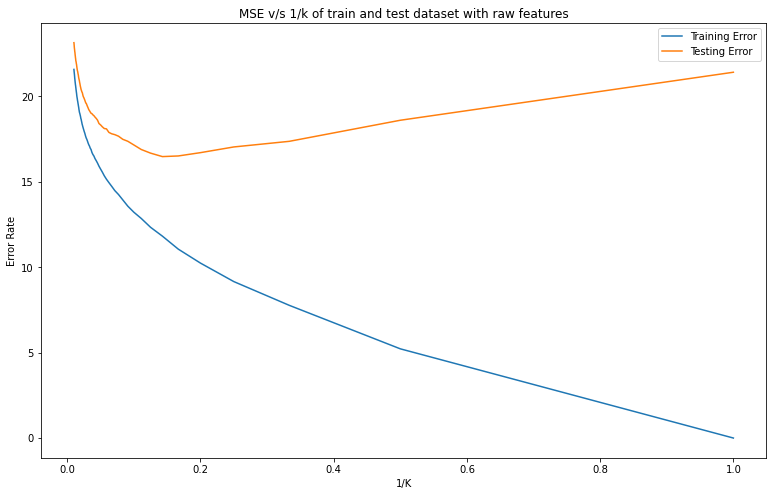

In [75]:
plt.figure(figsize=(13,8))
k_invert = list(1/np.array((range(1,101))))
plt.plot(k_invert,train_error_rate.values(), label="Training Error")
plt.plot(k_invert,test_error_rate.values(), label="Testing Error")
plt.title('MSE v/s 1/k of train and test dataset with raw features')
plt.xlabel('1/K')
plt.legend()
plt.ylabel('Error Rate')

In [76]:
print("Minimum error:-", min(test_error_rate.values()),"at K =", min(test_error_rate, key=test_error_rate.get))

Minimum error:- 16.479762094555692 at K = 7


In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Train Model and Predict
train_error_rate = {}
test_error_rate = {}
for i in range(1, 101, 1):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_train_value = knn.predict(X_train_scaled);
 train_error_rate[i] = mean_squared_error(y_train, pred_train_value)
 pred_test_value = knn.predict(X_test_scaled)
 test_error_rate[i] = mean_squared_error(y_test, pred_test_value)

Text(0, 0.5, 'Error Rate')

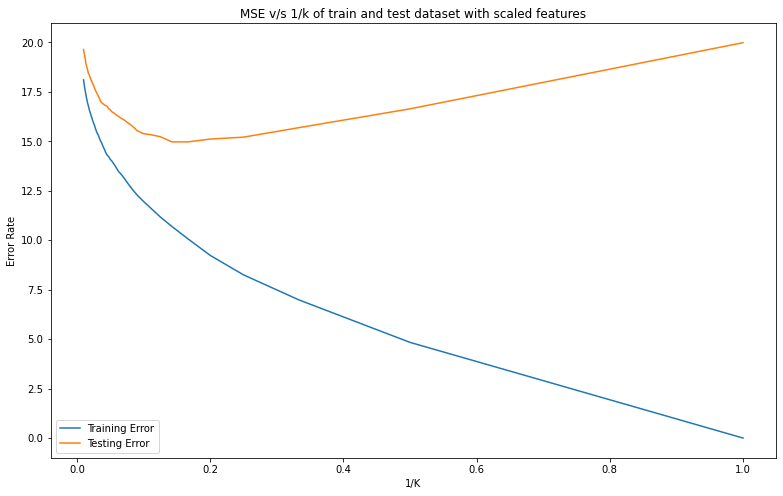

In [83]:
plt.figure(figsize=(13,8))
k_invert = list(1/np.array((range(1,101))))
plt.plot(k_invert,train_error_rate.values(), label="Training Error")
plt.plot(k_invert,test_error_rate.values(), label="Testing Error")
plt.title('MSE v/s 1/k of train and test dataset with scaled features')
plt.xlabel('1/K')
plt.legend()
plt.ylabel('Error Rate')

In [84]:
print("Minimum error:-", min(test_error_rate.values()),"at K =", min(test_error_rate, key=test_error_rate.get))

Minimum error:- 14.967191255466538 at K = 6


### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

The least test error - 18.85 for Linear regression is got when we use the model with interaction and polynomial terms. The KNN for k=6 has least test error of  14.96. KNN regressor predicts better for this dataset. The reason for better performance of KNN regression may be because the feature space is more complex than a linear relationship or the Singnal to Noise ratio is high in the data.

### 2. ISLR: 2.4.1

#### (a) The sample size n is extremely large, and the number of predictors p is small.

Ans: Flexible is better. A flexible model will perform better than inflexible model because the dataset size is large and the flexible model learns with low train error(bias)

#### (b) The number of predictors p is extremely large, and the number of observations n is small.

Ans: Inflexible is better. If the predictors are large and the data is small, the complex flexible model tends to overfit the data

#### (c) The relationship between the predictors and response is highly non-linear

Ans: Flexible is better. Since the relationship is non-linear, the flexible model is required here to learn from the non-linear space

#### (d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely high.

Ans: Inflexible is better. Since the variance of error is high, the flexible model if used tries to fit to the noise and gives decreased performance

### 3. ISLR: 2.4.7

x1 = x2 = x3 = 0

Red => sqrt(0^2 + 3^2 + 0^2) = 3
Red => sqrt(0^2 + 0^2 + 0^2) = 2
Red => sqrt(0^2 + 1^2 + 3^2) = 3.16
Green => sqrt(0^2 + 1^2 + 2^2) = 2.23
Green => sqrt(-1^2 + 0^2 + 1^2) = 1.41
Red => sqrt(1^2 + 1^2 + 1^2) = 1.73

In [80]:
data = [[0,3,0,'Red'],
       [2,0,0,'Red'],
       [0,1,3,'Red'],
       [0,1,2,'Green'],
       [-1,0,1,'Green'],
       [1,1,1,'Red']]

df = pd.DataFrame(data, index= [0,1,2,3,4,5], columns=["X1","X2","X3","Y"])

for i in range(len(df)) :
    point_1 = df.iloc[i, 0:3] 
    point_2 = [0, 0, 0]
    square = np.square(point_1 - point_2)
    sum_square = np.sum(square)
    distance = np.sqrt(sum_square)
    print(distance)

3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


#### (b) What is our prediction with K = 1? Why?

Green. k=1 is choose value of the nearest one. In this case it is the nearest neighbour is [-1, 0, 1] with value green

#### (c) What is our prediction with K = 3? Why?

Red. k=3 is choose the value based on the nearest three neighbours. The nearest neighbours [-1, 0, 1] has value green, [1,1,1] has value red and [2,0,0] has value red. So using majority poling, assign the value red

#### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

We expect best value for  𝐾  to be small. This is because as  𝐾  increases, the method of  𝐾-nearest neighbors becomes less flexible and produces a decision boundary which is more linear. A small value for  𝐾 , on the other hand, results in increased flexibility(leverages local averaging) and a decision boundary which is more non-linear.